In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
churn_df =pd.read_csv('ChurnData.csv')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
# Data preprocessing and selection
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ','equip', 'callcard', 'wireless', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [7]:
#  define X 
X = np.asarray(churn_df[['tenure', 'age', 'address', 'ed', 'employ', 'equip']])
X[0:5]

array([[11., 33.,  7.,  5.,  5.,  0.],
       [33., 33., 12.,  2.,  0.,  0.],
       [23., 30.,  9.,  1.,  2.,  0.],
       [38., 35.,  5.,  2., 10.,  1.],
       [ 7., 35., 14.,  2., 15.,  0.]])

In [8]:
y = np.asarray(churn_df['churn'])
y[0:5]

array([1, 1, 0, 0, 0])

In [9]:
#  normalizing the dataset
from sklearn import preprocessing 
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  1.6961288 , -0.58477841,
        -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.6433592 , -1.14437497,
        -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -1.42318853, -0.92053635,
        -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219, -0.6433592 , -0.02518185,
         1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574, -0.6433592 ,  0.53441472,
        -0.85972695]])

In [13]:
#  Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (160, 6) (160,)
Test set: (40, 6) (40,)


In [14]:
#  Modelling
# C = parameter indicating inverse of regularization strength
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C= 0.01, solver = 'liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
#  Predict
yhat=LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [17]:
#  predict_proba estimates for all classes , ordered  by the label of all classes 
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.53966587, 0.46033413],
       [0.60581288, 0.39418712],
       [0.56411192, 0.43588808],
       [0.63313633, 0.36686367],
       [0.56514999, 0.43485001],
       [0.55440679, 0.44559321],
       [0.52270027, 0.47729973],
       [0.60627024, 0.39372976],
       [0.41181785, 0.58818215],
       [0.63443882, 0.36556118],
       [0.57955436, 0.42044564],
       [0.62413444, 0.37586556],
       [0.47636252, 0.52363748],
       [0.42852425, 0.57147575],
       [0.66278108, 0.33721892],
       [0.55164561, 0.44835439],
       [0.51832057, 0.48167943],
       [0.48653198, 0.51346802],
       [0.49095818, 0.50904182],
       [0.52599496, 0.47400504],
       [0.61718676, 0.38281324],
       [0.52858072, 0.47141928],
       [0.64029095, 0.35970905],
       [0.52297292, 0.47702708],
       [0.50435637, 0.49564363],
       [0.70895161, 0.29104839],
       [0.54625448, 0.45374552],
       [0.52381539, 0.47618461],
       [0.51731387, 0.48268613],
       [0.70726301, 0.29273699],
       [0.

In [20]:
# Evaluation 
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.75

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix (cm,classes,
                           normalize=False,
                          title='confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else :
        print("Confusion Matrix without normalization")
    print(cm)
    
    plt.imshow(cm,interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arrange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    
    ftm = '.2f' if normalize else 'd'
    thresh = cm.max()/ 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i,j, format(cm[i,j], ftm),
                horizontalalignment="center",
                color="white" if cm [i,j]> thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print (confusion_matrix(y_test,yhat, labels=[1,0]))

[[ 6  9]
 [ 1 24]]


Confusion Matrix without normalization
[[ 6  9]
 [ 1 24]]


AttributeError: module 'numpy' has no attribute 'arrange'

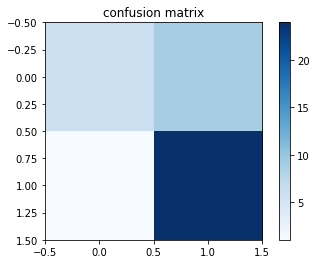

In [24]:
#  compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

#  plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1', 'churn=0'], normalize=False, title='confusion matrix')

In [25]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



In [26]:
from sklearn.metrics import log_loss
log_loss(y_test,yhat_prob)

0.6024139923581048